###### Data Science, lesson 18, homework
Veranika I.
12.01.2024
v1

###### Высокая цель: уменшить размерность векторного представления слов текстуальных данных.Построить графики уменьшения размерности. 
    
1. Загрузка текстового файла из корневого каталога.
2. Обработка текстовых данных.
3. Понижение размерности текстовых данных.
4. Построить график объема информации. 

###### 1Загрузка текстового файла из корневого каталога.

In [17]:
with open('electronica.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [18]:
text

'Electronica is both a broad group of electronic-based music styles intended for listening rather than strictly for dancing[2][1] and a music scene that came to prominence in the early 1990s in the United Kingdom.[1] In the United States, the term is mostly used to refer to electronic music generally.[3]\n\nHistory\nEarly 1990s: origins and UK scene\nThe original wide-spread use of the term "electronica" derives from the influential English experimental techno label New Electronica, which was one of the leading forces of the early 1990s introducing and supporting dance-based electronic music oriented towards home listening rather than dance-floor play,[1] although the word "electronica" had already begun to be associated with synthesizer generated music as early as 1983, when a "UK Electronica Festival" was first held.[4][5][6] At that time electronica became known as "electronic listening music", also becoming more or less synonymous to ambient techno and intelligent techno, and was c

###### 2 Обработка текстовых данных.

In [24]:
sentences = text.split('\n') # Разбиение текста на предложения
sentences = [s for s in sentences if s]  # Удаление пустых строк

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english') ## Векторизация слов с помощью TF-IDF
X = vectorizer.fit_transform(sentences)

In [32]:
X

<20x331 sparse matrix of type '<class 'numpy.float64'>'
	with 475 stored elements in Compressed Sparse Row format>

###### 3 Понижение размерности

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

In [35]:
X_reduced

array([[ 0.52464989,  0.11530781],
       [-0.26265036,  0.17406229],
       [ 0.13800638,  0.49525153],
       [ 0.47596196, -0.01990057],
       [-0.28135538, -0.12151711],
       [ 0.0474581 ,  0.10389895],
       [-0.10858764, -0.26277041],
       [-0.25293538, -0.26089185],
       [-0.24919065, -0.34745229],
       [-0.16211633,  0.41189209],
       [ 0.05672795, -0.31113135],
       [-0.07978461, -0.1184138 ],
       [-0.26265036,  0.17406229],
       [ 0.14986073, -0.14000422],
       [-0.08569053, -0.33658587],
       [-0.26265036,  0.17406229],
       [ 0.39761299, -0.17622004],
       [ 0.48409225, -0.0377408 ],
       [-0.26265036,  0.17406229],
       [-0.00410828,  0.31002876]])

In [37]:
import numpy as np
explained_variance = np.cumsum(pca.explained_variance_ratio_) # Вычисление объема информации для каждой компоненты

In [38]:
explained_variance

array([0.08124666, 0.14768642])

###### 4 Построение графика объема информации

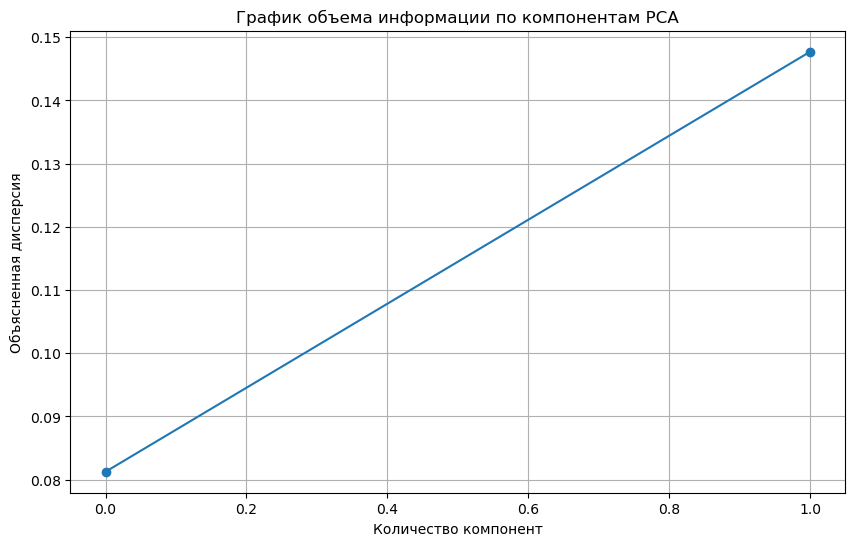

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) #создание новой фигуры для графика с заданными размерами(ширина фигуры - 10 дюймов, а высота - 6 дюймов)
plt.plot(explained_variance, marker='o') # построение графика объясненной дисперсии (explained_variance), которая была рассчитана ранее
plt.xlabel('Количество компонент') # горизонтальная ось (X)
plt.ylabel('Объясненная дисперсия') # вертикальная ось (Y)
plt.title('График объема информации по компонентам PCA') # заголовок для графика
plt.grid(True) # Включает сетку на графике для лучшей читаемости
plt.show() 

###### выводы:
1)Наблюдается линейное увеличение объясненной дисперсии
2)На графике не наблюдается явной точки, в которой прирост объясненной дисперсии резко снижается
3)Для определения, сколько компонент PCA действительно нужно для адекватного представления данных, следует рассмотреть использование большего количества компонент и наблюдать за изменением объясненной дисперсии